# Online Shopper's Intention

Goal: build a classification model that will predict whether a shopper is a paying customer based on the available features (10 numerical and 7 categorical features, not including the "revenue" category). 

Basic steps will involve: data cleaning -> data exploration -> model pipeline -> model examination -> data exploration again(?)

The data were downloaded from Kaggle [here](https://www.kaggle.com/roshansharma/online-shoppers-intention) and the explanation of the features can be found on there. 

Some things I don't fully understand even after reading the Kaggle info for the dataset are: 1) what is traffic type? What are bounce and exit rates and what's the difference between them? 3) Why would webpage duration have negative values? 4) Are administrative, product, and informational categorical (technically) or truly numeric? I don't know what they represent in the real world

### Sources of leakage? 

Exit and bounce rates? Hmmm...

## Data Cleaning

.head(), .shape, .describe(), .info(), .isnull().sum(), .columns, .dtypes(), .fillna(value = ), .drop(..., axis = 1) - to drop columns, pd.read_csv()

- check out numerical values - are there any suspicious values?
- check out categorical values - are there any suspicious values?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
shoppers = pd.read_csv("online_shoppers_intention.csv")

In [5]:
type(shoppers)

pandas.core.frame.DataFrame

In [6]:
shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Look at the shape of the dataset to understand how much data you're working with

In [7]:
shoppers.shape ## 12330 rows, 18 columns

(12330, 18)

12330 rows = 12330 samples

Describe the numerical features

In [8]:
shoppers.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


None of the numerical features appear as though they have "incorrect" values (e.g. negative values in a feature that could only have positive values).

One thing that's noticeable is that the mean value in most categories is a lot smaller than the max value, suggesting strongly right skewed distributions of values in each category. 

Notice that "Region", "Browser", "OperatingSystems", and "TrafficType" are being categorized as a numeric features, but they're actually numbers representing categories, so you'll have to switch this over later I think? 

The other point of confusion is that I'm not entirely sure whether "Administrative", "Informational", or "ProductRelated" should be considered as categories or numerical values because I'm not sure of what they represent in the real world :/

In [9]:
shoppers.columns ## just the column names

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

Looking for null values in the columns

In [10]:
shoppers.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Not many null values, but suspicially 14 samples have null values in the first 8 features, and these might be important features for our model. But 14 samples represents a small portion of the total dataset, to the easiest way to fix those missing values is to drop those samples from the dataset rather than finding a way to impute them. 

In [11]:
shoppers = shoppers.dropna(axis = 0)

In [12]:
shoppers.isnull().sum() ## no remaining null values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [13]:
shoppers.shape ## should be 14 rows less

(12316, 18)

In [14]:
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  object 
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType           

In [15]:
cat_cols = ['Month', 'OperatingSystems', 'Browser', 'Region',
           'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
for col in cat_cols:
    shoppers[col] = shoppers[col].astype('category')

In [16]:
shoppers.dtypes ## I... think that's what I want...?

Administrative              float64
Administrative_Duration     float64
Informational               float64
Informational_Duration      float64
ProductRelated              float64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                    category
Revenue                    category
dtype: object

Look at the categorical values of the category features and see if there are any weird values that might be data errors

In [17]:
for col in cat_cols:
    print(shoppers[col].unique())

[Feb, Mar, May, Oct, June, Jul, Aug, Nov, Sep, Dec]
Categories (10, object): [Feb, Mar, May, Oct, ..., Aug, Nov, Sep, Dec]
[1, 2, 4, 3, 7, 6, 8, 5]
Categories (8, int64): [1, 2, 4, 3, 7, 6, 8, 5]
[1, 2, 3, 4, 5, ..., 8, 9, 12, 13, 11]
Length: 13
Categories (13, int64): [1, 2, 3, 4, ..., 9, 12, 13, 11]
[1, 9, 2, 3, 4, 5, 6, 7, 8]
Categories (9, int64): [1, 9, 2, 3, ..., 5, 6, 7, 8]
[1, 2, 3, 4, 5, ..., 18, 19, 16, 17, 20]
Length: 20
Categories (20, int64): [1, 2, 3, 4, ..., 19, 16, 17, 20]
[Returning_Visitor, New_Visitor, Other]
Categories (3, object): [Returning_Visitor, New_Visitor, Other]
[False, True]
Categories (2, object): [False, True]
[False, True]
Categories (2, object): [False, True]


The only things I could notice about this is that 1) the month column only has 10 months represented, January and April are missing, not sure how/if that will come up later 2) there is an "other" value in the returning visitor category, let's see how many samples have "other" as the return visitor value

In [18]:
sum(shoppers['VisitorType'] == 'Other') ## 85 have this other type

85

85 samples have the visitor type listed as "Other" - that's not insignificant I suppose and "Other" might have some actually important value, so let's leave it. It shouldn't interfere too much. 

In [19]:
len(shoppers.loc[shoppers['ProductRelated_Duration'] == -1, 'ProductRelated_Duration'])

33

In [20]:
# remove the -1 duration
len(shoppers.loc[shoppers['Informational_Duration'] == -1, 'Informational_Duration'])

33

In [21]:
len(shoppers.loc[shoppers['Administrative_Duration'] == -1, 'Administrative_Duration'])

33

In [22]:
## okay so looks like the -1 are all in the same row so let's drop those rows

shoppers = shoppers.loc[shoppers['Administrative_Duration'] != -1, ]

In [23]:
## how many shoppers spent zero amount of time on the website - these ones maybe are
## rounded down because they spent so little time on the site (<0)
sum(shoppers[['ProductRelated_Duration',
              'Informational_Duration',
              'Administrative_Duration']].sum(axis = 1) == 0)

685

In [24]:
## remove the shoppers that spent 0 amount of time on the website
shoppers = shoppers.loc[shoppers[['ProductRelated_Duration', 
          'Informational_Duration', 
          'Administrative_Duration']].sum(axis = 1) != 0, ]

## Data Exploration

Now that data are clean and there are no missing values we can begin the exploratory data analysis

### EDA Questions

* Where do shoppers come from (region)?
* Do new or returning customers spend longer on the website?
* Which part of the website (admin/product/information) are new vs returning customers more likely to spend their time? 
* Does site visitation increase around special days? Which special days? Does this change based on the type of customer (new vs. returning)? 
* What special day attracts more new users? 
* Does site visitation increase on the weekend? 
* What month of the year are there more users? Is this related to special days? 


#### What region do shoppers come from?

To answer this we have to count the number of values of each region and then plot the values in an ordered histogram -- can do this all at once using sns.countplot

Text(0, 0.5, 'Number of Visitors')

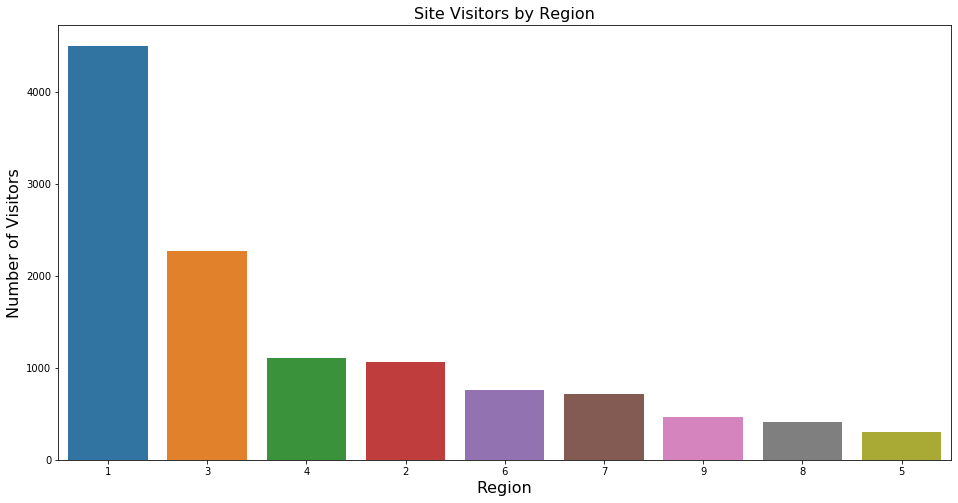

In [25]:
plt.figure(figsize = (16,8))
sns.countplot(x = "Region", data = shoppers, 
              order = shoppers['Region'].value_counts().index)
plt.title("Site Visitors by Region", fontsize = 16)
plt.xlabel("Region", fontsize = 16)
plt.ylabel("Number of Visitors", fontsize = 16)

The vast majority of visitors are from Region 1 - but we don't know where exactly that is. But maybe if you were in charge of these data you would... Anway that was an interesting exercise. 

### Do new or returning customers spend longer on the website?

You'll have to group the data by visitortype (.groupby() perhaps) and then add up their total time spent on the site (across informational, product, administrative types) and then plot a boxplot comparing the returning versus new customer. You can also do a permutation test to see if there is a statistical difference (if it looks like there might be one).

In [26]:
shoppers.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

Columns you want are "Administrative_Duration", "Informational_Duration", 'ProductRelated_Duration"

In [27]:
dur = shoppers[['Administrative_Duration', 
          'Informational_Duration', 
          'ProductRelated_Duration']].sum(axis = 1)

In [28]:
site_duration = pd.DataFrame({"VisitorType": shoppers['VisitorType'],
                           "TotalDuration": dur
                           })

In [29]:
site_duration

,VisitorType,TotalDuration
1,Returning_Visitor,64.000000
3,Returning_Visitor,2.666667
4,Returning_Visitor,627.500000
5,Returning_Visitor,154.216667
8,Returning_Visitor,37.000000
...,...,...
12325,Returning_Visitor,1928.791667
12326,Returning_Visitor,465.750000
12327,Returning_Visitor,184.250000
12328,Returning_Visitor,421.000000


Text(0, 0.5, 'Total Time on Site (seconds)')

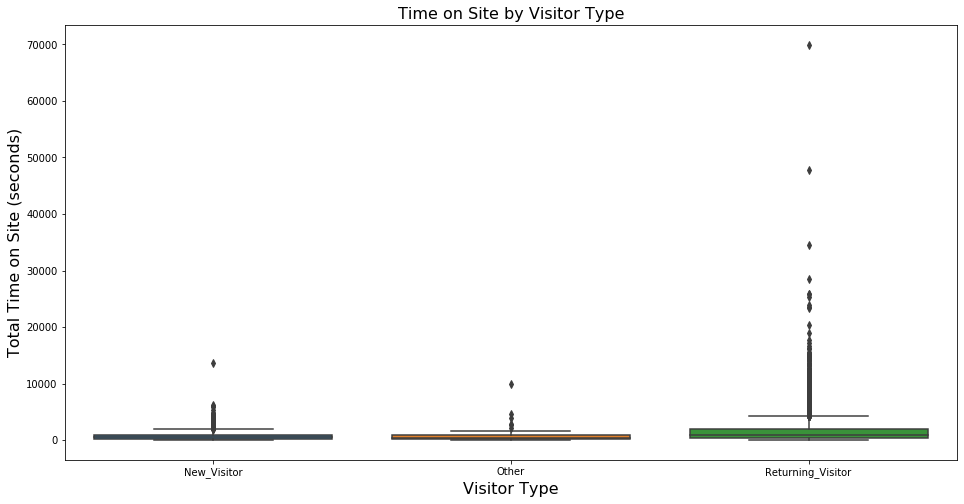

In [30]:
plt.figure(figsize = (16,8))
sns.boxplot('VisitorType', 'TotalDuration', data = site_duration)
plt.title("Time on Site by Visitor Type", fontsize = 16)
plt.xlabel("Visitor Type", fontsize = 16)
plt.ylabel("Total Time on Site (seconds)", fontsize = 16)

It's hard to tell but it already looks like returning visitors spend longer on the site. I would say we could take the log to make the spread of the durations easier to see but the values include zeros and negatives, so it wouldn't work. 

To check whether returning visitors spend a significantly longer time on the site than new visitors we can do a permutation test

In [31]:
ret_duration = list(site_duration.loc[
    site_duration['VisitorType'] == 'Returning_Visitor', 'TotalDuration'])

In [32]:
new_duration = list(site_duration.loc[
    site_duration['VisitorType'] == 'New_Visitor', 'TotalDuration'])

In [33]:
import copy
import random

In [34]:
## write a permutation function for mean

def perm_mean(group_1, group_2, p): ## two lists and a numeric value for the number of permutations
    """Returns the p-value for a permutation test of difference in means between
    two groups"""
    
    ## observed difference in means
    obs_mean = np.abs(np.average(group_1) - np.average(group_2))
    
    ## pool the observations into a single list
    pooled_groups = list(group_1 + group_2)
    
    ## make a copy that can be randomly shuffled for the permutations
    pooled_copy = copy.copy(pooled_groups)
    
    ## a space to save permutation output
    perm_means = []
    
    ## permutations
    for i in range(0, p):
        ## randomly shuffle the pooled observations
        random.shuffle(pooled_copy)
        
        ## calculate differences in mean for each permutation
        perm_means.append(
            np.abs(np.average(
                pooled_copy[0:len(group_1)]) - np.average(pooled_copy[len(group_1):])))

    ## calculate the p-value as proportion of the permuted means that had a larger
    ## difference in means than the observed difference in means
    p_value = sum(perm_means >= obs_mean)/p
    
    return p_value


In [35]:
perm_mean(ret_duration, new_duration, 1000)

0.0

So none of the permutations had a difference in means greater than the observed difference in means, and the mean duration on the site of the returning customers is larger than the mean duration on the site of new customers which leads us to determine that returning customers spend significantly more time on the site than new customers, which makes sense!

### Which part of the website (admin/product/information) are new vs returning customers more likely to spend their time? 

Will want to do as similar thing as above except we break up the box plots into the page type 

In [36]:
shoppers.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [37]:
duration = list(shoppers['Administrative_Duration']) + list(
    shoppers['ProductRelated_Duration']) + list(
    shoppers['Informational_Duration'])

In [38]:
import itertools

In [39]:
duration_type = list(
    itertools.repeat('Administrative', len(shoppers['Administrative_Duration']))) + list(
    itertools.repeat('ProductRelated', len(shoppers['ProductRelated_Duration']))) + list(
    itertools.repeat('Informational', len(shoppers['Informational_Duration'])))

In [41]:
visitor_type = list(shoppers['VisitorType'])*3

In [42]:
duration_info = pd.DataFrame({"Visitor Type": visitor_type,
                           "Duration Type": duration_type,
                           "Duration": duration})

In [43]:
duration_info

,Visitor Type,Duration Type,Duration
0,Returning_Visitor,Administrative,0.0
1,Returning_Visitor,Administrative,0.0
2,Returning_Visitor,Administrative,0.0
3,Returning_Visitor,Administrative,0.0
4,Returning_Visitor,Administrative,0.0
...,...,...,...
34789,Returning_Visitor,Informational,0.0
34790,Returning_Visitor,Informational,0.0
34791,Returning_Visitor,Informational,0.0
34792,Returning_Visitor,Informational,0.0


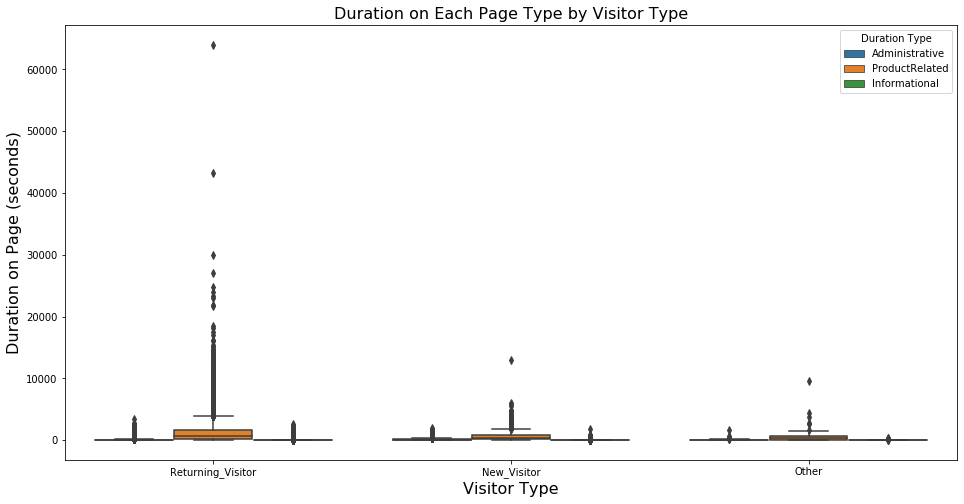

In [44]:
plt.figure(figsize = (16,8))
sns.boxplot('Visitor Type', 'Duration', data = duration_info, hue = 'Duration Type')
plt.title("Duration on Each Page Type by Visitor Type", fontsize = 16)
plt.xlabel("Visitor Type", fontsize = 16)
plt.ylabel("Duration on Page (seconds)", fontsize = 16)
plt.show()

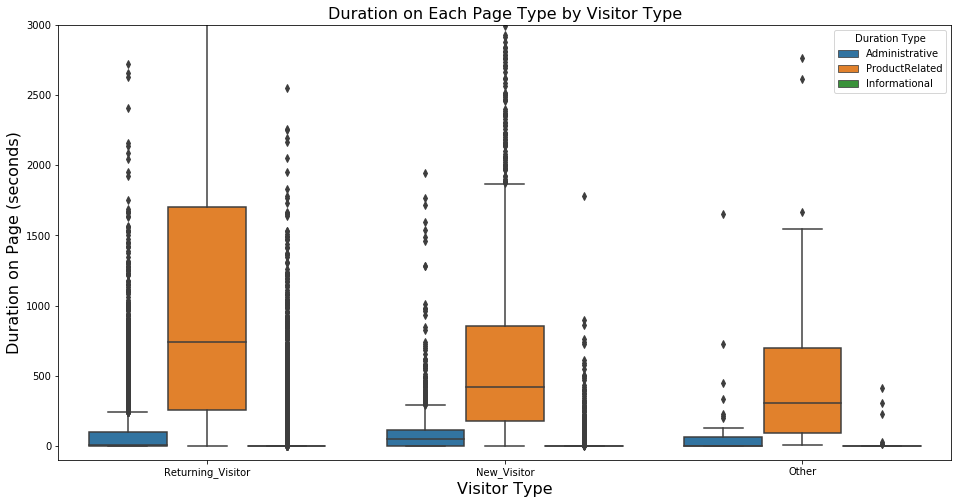

In [45]:
plt.figure(figsize = (16,8))
sns.boxplot('Visitor Type', 'Duration', data = duration_info, hue = 'Duration Type')
plt.title("Duration on Each Page Type by Visitor Type", fontsize = 16)
plt.xlabel("Visitor Type", fontsize = 16)
plt.ylabel("Duration on Page (seconds)", fontsize = 16)
plt.ylim((-100, 3000))
plt.show()

Again, the distributions are so right skewed that this looks crazy but you can see from the graph when it's zoomed in that returning customers spend longer on the product related portion of the website, and it appears as though new visitors spend a little longer than returning visitors on the administrative parts of the website. 

Looking at the percent of their visit time each customer spends on each section

In [46]:
duration_info ## ok something got fucked up

,Visitor Type,Duration Type,Duration
0,Returning_Visitor,Administrative,0.0
1,Returning_Visitor,Administrative,0.0
2,Returning_Visitor,Administrative,0.0
3,Returning_Visitor,Administrative,0.0
4,Returning_Visitor,Administrative,0.0
...,...,...,...
34789,Returning_Visitor,Informational,0.0
34790,Returning_Visitor,Informational,0.0
34791,Returning_Visitor,Informational,0.0
34792,Returning_Visitor,Informational,0.0


In [47]:
shoppers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [48]:
duration_info['Total Duration'] = list(site_duration['TotalDuration'])*3

In [49]:
duration_info

,Visitor Type,Duration Type,Duration,Total Duration
0,Returning_Visitor,Administrative,0.0,64.000000
1,Returning_Visitor,Administrative,0.0,2.666667
2,Returning_Visitor,Administrative,0.0,627.500000
3,Returning_Visitor,Administrative,0.0,154.216667
4,Returning_Visitor,Administrative,0.0,37.000000
...,...,...,...,...
34789,Returning_Visitor,Informational,0.0,1928.791667
34790,Returning_Visitor,Informational,0.0,465.750000
34791,Returning_Visitor,Informational,0.0,184.250000
34792,Returning_Visitor,Informational,0.0,421.000000


In [50]:
## percentages
duration_info['Duration Percent'] = duration_info['Duration']/duration_info['Total Duration']

In [51]:
duration_info

,Visitor Type,Duration Type,Duration,Total Duration,Duration Percent
0,Returning_Visitor,Administrative,0.0,64.000000,0.0
1,Returning_Visitor,Administrative,0.0,2.666667,0.0
2,Returning_Visitor,Administrative,0.0,627.500000,0.0
3,Returning_Visitor,Administrative,0.0,154.216667,0.0
4,Returning_Visitor,Administrative,0.0,37.000000,0.0
...,...,...,...,...,...
34789,Returning_Visitor,Informational,0.0,1928.791667,0.0
34790,Returning_Visitor,Informational,0.0,465.750000,0.0
34791,Returning_Visitor,Informational,0.0,184.250000,0.0
34792,Returning_Visitor,Informational,0.0,421.000000,0.0


In [52]:
min(duration_info['Duration Percent'])

0.0

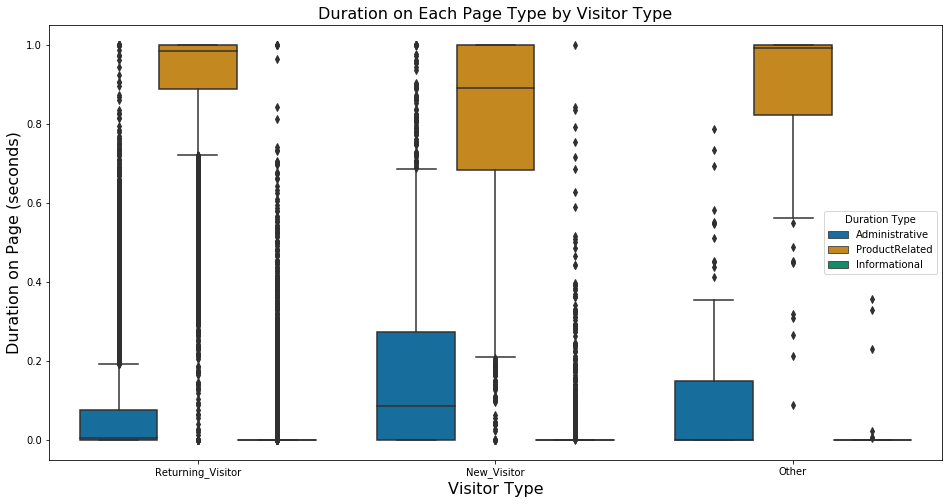

In [53]:
plt.figure(figsize = (16,8))
sns.boxplot('Visitor Type', 'Duration Percent', data = duration_info, hue = 'Duration Type',
              palette = "colorblind")
plt.title("Duration on Each Page Type by Visitor Type", fontsize = 16)
plt.xlabel("Visitor Type", fontsize = 16)
plt.ylabel("Duration on Page (seconds)", fontsize = 16)
plt.show()

The vast majority of users time is spent on product related pages, with more time spent on administrative pages by new visitors than returning visitors. 

### What percent of visitors to the site were new vs. returning?

In [54]:
percent_ret = round(shoppers['VisitorType'].value_counts()['Returning_Visitor']/len(shoppers['VisitorType'])*100, 2)
percent_new = round(shoppers['VisitorType'].value_counts()['New_Visitor']/len(shoppers['VisitorType'])*100, 2)

print(f"{percent_ret} % visitors were returning")
print(f"{percent_new} % visitors were new")

85.06 % visitors were returning
14.36 % visitors were new


### Did visitation change across the year? 

Need to count the number of visitors 

In [55]:
shoppers.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [56]:
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 
                  'Nov', 'Dec']

In [57]:
to_add = pd.Series(list(itertools.repeat(0, 12)), index = ordered_months)
to_add.index = pd.Categorical(to_add.index, categories = ordered_months, ordered = True)

In [58]:
to_add.index.categories

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')

In [59]:
def addMonths(visitor_type, ordered_months, to_add):

    month_info = shoppers.loc[shoppers["VisitorType"] == visitor_type]["Month"].value_counts()
    month_info.index = month_info.index.add_categories(['Jan', 'Apr'])
    month_info.index = month_info.index.reorder_categories(ordered_months, ordered = True)
    month_info = pd.DataFrame(month_info.combine(to_add, max, fill_value = 0))
    month_info['Visitor Type'] = list(itertools.repeat(visitor_type, len(ordered_months)))
    month_info.columns = ['Num. Visitors' if x==0 else x for x in month_info.columns]
    
    return month_info

In [60]:
ret_info = addMonths("Returning_Visitor", ordered_months, to_add)

In [61]:
new_info = addMonths("New_Visitor", ordered_months, to_add)

In [62]:
month_info = pd.concat([ret_info, new_info])

In [63]:
month_info

,Num. Visitors,Visitor Type
Jan,0,Returning_Visitor
Feb,149,Returning_Visitor
Mar,1530,Returning_Visitor
Apr,0,Returning_Visitor
May,2829,Returning_Visitor
June,231,Returning_Visitor
Jul,356,Returning_Visitor
Aug,350,Returning_Visitor
Sep,334,Returning_Visitor
Oct,420,Returning_Visitor


Okay well that was all well and good and a real learning experience about categorical data and data manipulation but I've figured out a much faster way to do this

In [64]:
## this bit might not be the cleanest and I wish I could figure out a better way
## dataframe that counts the entries in each group (visitor type & month)
month_info = shoppers.groupby(['VisitorType', 'Month']).count()

In [65]:
## only need one of those columns
month_info = pd.DataFrame(month_info.iloc[:, 1])

In [66]:
## turns the index into columns
month_info.reset_index(inplace = True)

In [67]:
## change column names
month_info.columns = ['Visitor Type', 'Month', 'Num. Visitors']

In [68]:
month_info['Num. Visitors'].fillna(value = 0, inplace = True)

In [69]:
month_info

,Visitor Type,Month,Num. Visitors
0,New_Visitor,Aug,71.0
1,New_Visitor,Dec,328.0
2,New_Visitor,Feb,1.0
3,New_Visitor,Jul,53.0
4,New_Visitor,June,29.0
5,New_Visitor,Mar,231.0
6,New_Visitor,May,313.0
7,New_Visitor,Nov,409.0
8,New_Visitor,Oct,122.0
9,New_Visitor,Sep,108.0


we do still have the problem of missing months - Jan and Apr

In [70]:
month_info['Month']

0      Aug
1      Dec
2      Feb
3      Jul
4     June
5      Mar
6      May
7      Nov
8      Oct
9      Sep
10     Aug
11     Dec
12     Feb
13     Jul
14    June
15     Mar
16     May
17     Nov
18     Oct
19     Sep
20     Aug
21     Dec
22     Feb
23     Jul
24    June
25     Mar
26     May
27     Nov
28     Oct
29     Sep
Name: Month, dtype: category
Categories (10, object): [Aug, Dec, Feb, Jul, ..., May, Nov, Oct, Sep]

In [71]:
month_info['Visitor Type'] = month_info['Visitor Type'].astype(str)

In [72]:
month_info['Month'] = month_info['Month'].astype(str)

In [73]:
month_info

,Visitor Type,Month,Num. Visitors
0,New_Visitor,Aug,71.0
1,New_Visitor,Dec,328.0
2,New_Visitor,Feb,1.0
3,New_Visitor,Jul,53.0
4,New_Visitor,June,29.0
5,New_Visitor,Mar,231.0
6,New_Visitor,May,313.0
7,New_Visitor,Nov,409.0
8,New_Visitor,Oct,122.0
9,New_Visitor,Sep,108.0


In [74]:
to_add = pd.DataFrame([], columns = month_info.columns)

In [75]:
to_add['Visitor Type'] = ['New_Visitor', 'New_Visitor', 
                          'Other', 'Other', 
                          'Returning_Visitor', 'Returning_Visitor']

In [76]:
to_add['Month'] = ['Jan', 'Apr']*3

In [77]:
to_add['Num. Visitors'] = [0]*6

In [78]:
to_add

,Visitor Type,Month,Num. Visitors
0,New_Visitor,Jan,0
1,New_Visitor,Apr,0
2,Other,Jan,0
3,Other,Apr,0
4,Returning_Visitor,Jan,0
5,Returning_Visitor,Apr,0


In [79]:
month_info = month_info.append(to_add)

In [80]:
month_info

,Visitor Type,Month,Num. Visitors
0,New_Visitor,Aug,71.0
1,New_Visitor,Dec,328.0
2,New_Visitor,Feb,1.0
3,New_Visitor,Jul,53.0
4,New_Visitor,June,29.0
5,New_Visitor,Mar,231.0
6,New_Visitor,May,313.0
7,New_Visitor,Nov,409.0
8,New_Visitor,Oct,122.0
9,New_Visitor,Sep,108.0


In [81]:
month_info['Month'] = pd.Categorical(month_info['Month'], categories = ordered_months,
                                    ordered = True)

In [82]:
month_info

,Visitor Type,Month,Num. Visitors
0,New_Visitor,Aug,71.0
1,New_Visitor,Dec,328.0
2,New_Visitor,Feb,1.0
3,New_Visitor,Jul,53.0
4,New_Visitor,June,29.0
5,New_Visitor,Mar,231.0
6,New_Visitor,May,313.0
7,New_Visitor,Nov,409.0
8,New_Visitor,Oct,122.0
9,New_Visitor,Sep,108.0


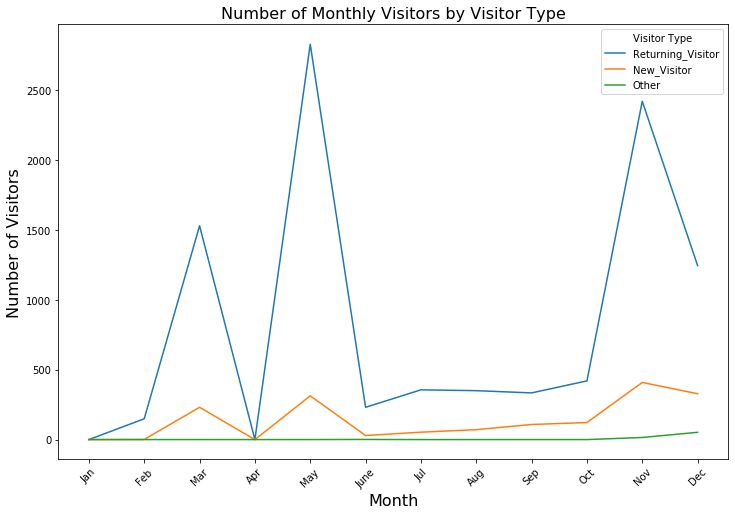

In [83]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = 'Month', y = "Num. Visitors", hue = "Visitor Type", data = month_info, 
            hue_order = ["Returning_Visitor", "New_Visitor", "Other"], sizes=(2.5, 2.5))
plt.title("Number of Monthly Visitors by Visitor Type", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of Visitors", fontsize=16)
plt.show()

What the graph is showing is spikes in the number of visitors around Mar, May, and November/December. It also showsthat the number of new visitors and the number of returning visitors are fairly in sync - there isn't a particular time during the year where more new visitors seem to be attracted whereas returning visitors aren't. This indicates that in terms of attracting visitors overall, the influence of time of the year is about the same for new and returning visitors. 

In [84]:
shoppers.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [85]:
np.average(shoppers.loc[shoppers['Month'] == 'May', 'SpecialDay'])

0.2153405474220242

In [86]:
np.average(shoppers.loc[shoppers['Month'] == 'Mar', 'SpecialDay'])

0.0

In [87]:
np.average(shoppers.loc[shoppers['Month'] == 'Jul', 'SpecialDay'])

0.0

In [88]:
np.average(shoppers.loc[shoppers['Month'] == 'Nov', 'SpecialDay'])

0.0

In [89]:
np.average(shoppers.loc[shoppers['Month'] == 'Dec', 'SpecialDay'])

0.0

In [90]:
shoppers['SpecialDay'].unique()

array([0. , 0.8, 0.4, 1. , 0.2, 0.6])

In [91]:
shoppers.loc[shoppers['SpecialDay'] > 0, 'Month'].unique()

[Feb, May]
Categories (2, object): [Feb, May]

This is showing that ONLY February and May are "close to special days" which seems wrong since we know there are special days (e.g. Christmas, Father's Day) that occur on other days
Hmmm... 
This indicates to me that in this case the "Special Day" data that this company is collecting could be more informative but as is, it's not particularly useful

Moving on then to looking at the distribution of our target variable and the thing that we are trying to predict: whether or not a site visitor generated revenue for the company

Based on our exploratory data analysis if you asked me to guess what would be the best predictor of whether a visitor generated revenue or not is whether that visitor is a returning visitor (returning visitor = higher probability of revenue), followed by the month that visitor accessed the site (if it's May, Mar, Nov, Dec = higher probability of revenue)

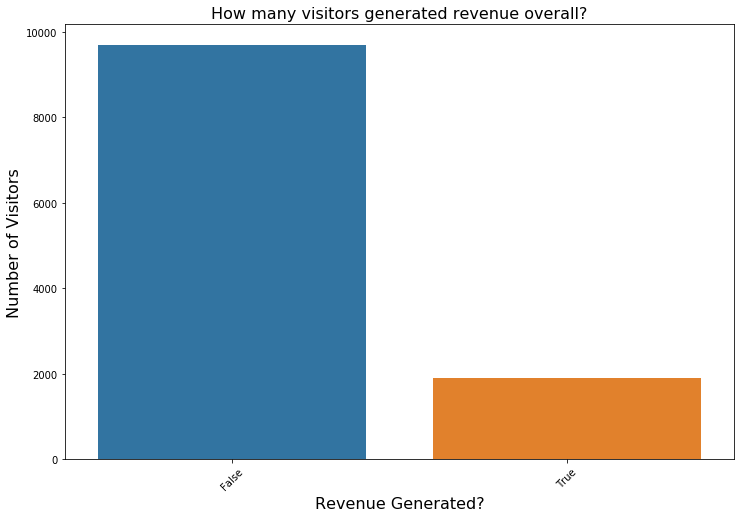

In [92]:
plt.figure(figsize=(12, 8))
sns.countplot(x = 'Revenue', data = shoppers)
plt.title("How many visitors generated revenue overall?", fontsize=16)
plt.xlabel("Revenue Generated?", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of Visitors", fontsize=16)
plt.show()

It's evident that the majority of visitors to the site do not generate revenue (as to be expected)

In [93]:
print(round(sum(shoppers['Revenue'])/len(shoppers['Revenue']), 2)*100, "% of visitors generate revenue")

16.0 % of visitors generate revenue


So only 16% of visitors generate revenue - low! But i'm not sure how that is in comparison to other sites - perhaps it's actually relatively high! Hard to say. 

Since there is an imblanaced data in our label values (more falses than trues) we will use a stratified sampling approach when splitting the data into training and test data and use F1 score to assess model performance.

## Preparing the data

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Feature Selection
Target/Dependent/Classification/Label = "Revenue"
Features/Independent = All the other columns

In [95]:
shoppers.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [96]:
shoppers.dtypes

Administrative              float64
Administrative_Duration     float64
Informational               float64
Informational_Duration      float64
ProductRelated              float64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                    category
Revenue                    category
dtype: object

We have 7 categorical features, 10 numeric features, and 1 target variable (aka label or independent variable)

We must econde the categorical features so that they can be given to the model, since the model does not take python objects (strings)

In [97]:
cat_vars = list(shoppers.select_dtypes('category').columns)

In [98]:
num_vars = list(shoppers.select_dtypes('float').columns)

In [99]:
cat_vars = cat_vars[:-1] ## drop the revenue label

In [100]:
shoppers_dummies = pd.get_dummies(shoppers, columns = cat_vars)

In [101]:
shoppers_dummies.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,0,0,0,0,0,0,0,1,1,0


In [102]:
shoppers_dummies.columns ## no revenue column because we already dropped it so no need to dop it now

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType

In [103]:
X = shoppers_dummies ## independent variables

In [104]:
y = shoppers['Revenue'] ## dependent variable

In [105]:
y = y.astype(int) ## transform boolean to 0s and 1s

### Split the dataset into train/test

70-30 train-test split

In [137]:
## use the stratify argument here because of the uneven distribution of true and false values
## in the target variable (revenue)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size = 0.3, random_state = 42,
                                                stratify = y)

### Preprocess the data and build the model

Build a pipeline that will standardize the numeric values, tune the hyperparameters, and run classification model

In [215]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import svm
from xgboost import XGBClassifier
from itertools import compress

In [219]:
# define models to test:
base_models = [("clf", LogisticRegression(random_state=42)),
               ("clf", DecisionTreeClassifier(random_state=42)),
               ("clf", svm.SVC(random_state=42))]

In [222]:
svm.SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

Define parameters to check

In [220]:
check_params_lr = {'clf__C': [0.1, 1, 10, 100],
                  'pca__n_components':[2, 3, 4, 5, 6]}
check_params_dt = {'pca__n_components':[2, 3, 4, 5, 6],
               'clf__criterion':['gini', 'entropy'],
               'clf__min_samples_split': [2,3,4],
               'clf__max_depth': np.arange(3,15)}
check_params_svc = {'pca__n_components': [2, 3, 4, 5, 6],
                   'clf__C': [0.1, 1, 10, 100]}

check_params = [check_params_lr, check_params_dt, check_params_svc]

In [221]:
def model_fit(model, params, X_train, y_train, X_test, y_test):
    
    pipe = Pipeline([('sc1', StandardScaler()),
                     ('pca', PCA()),
                    model])
    
    gs = GridSearchCV(estimator = pipe,
                     param_grid = params,
                     scoring = 'accuracy',
                     cv = 5)
    
    gs.fit(X_train, y_train)
    
    # evaluate the model on the test set
    y_true, y_pred = y_test, gs.predict(X_test)

    # get classification report for the gs model
    print(classification_report(y_true, y_pred))
    

Run the pipeline parameter tuning and model for each model

In [223]:
for mod, param in zip(base_models, check_params):
    model_fit(mod, param, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2908
           1       0.62      0.24      0.35       572

    accuracy                           0.85      3480
   macro avg       0.74      0.61      0.63      3480
weighted avg       0.83      0.85      0.82      3480

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      2908
           1       0.58      0.43      0.50       572

    accuracy                           0.86      3480
   macro avg       0.74      0.69      0.71      3480
weighted avg       0.84      0.86      0.85      3480

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2908
           1       0.74      0.45      0.56       572

    accuracy                           0.88      3480
   macro avg       0.82      0.71      0.75      3480
weighted avg       0.87      0.88      0.87      3480



The best performing model (marginally) is the SVC. Since we have imbalanced data, we can look at the accuracy but it is more useful to look at the F1 score since that also takes into account incorrect predictions (which we may have in the minority class). The model performancees are good not great, so there is room for improvement in these models which we can explore later. I'll 